In [1]:
import os
from sklearn.feature_extraction.text import CountVectorizer
import lda
import numpy as np
import pickle
import seaborn as sns

from matplotlib import pyplot as plt 

In [2]:
dataname = "Data-Media-Oct"
root = "/home/vietphan/Downloads/fbcrawl/"+dataname+"/model/"

In [3]:
filename = root + "done_processing.txt"
rating_file = root + "rating.txt"
source = root + "source.txt"

source_name = []
corpus = []
page_id = []
doc_count = 0
rating = []
blank = []

with open(filename, 'r') as f:
    line = f.readline()
    while(line):
        if(line[0]!="*"):
            corpus.append(line)
        elif(lens(line)==0):
            print("wtf?")
            # doc_count = doc_count +1
        line = f.readline()
with open(rating_file, 'r') as f2:
    line = f2.readline()
    while(line):
        if(line[0]=="*"):
            page_id.append(doc_count)#-len(page_id))
        else:
            rating.append(np.int64(line))
            doc_count = doc_count +1
        line = f2.readline()
with open(source, 'r') as f3:
    line = f3.readline()
    while(line):
        if(line[0]=="*"):
#             page_id.append(doc_count-len(page_id))
            a = 6
        else:
            source_name.append(line)
            doc_count = doc_count +1
        line = f3.readline()
#         print(line)


for i in range(len(page_id)-1):
    sum = 0
    for j in range(page_id[i],page_id[i+1]):
        sum = sum + rating[j]
        # print(j)
    for j in range(page_id[i],page_id[i+1]):
        rating[j] = rating[j]/sum

sum = 0
for j in range(page_id[-1],len(rating)):
    sum = sum + rating[j]
for j in range(page_id[-1],len(rating)):
    rating[j] = rating[j]/sum
# print(rating)
# print(corpus)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names()
# print(vectorizer.get_feature_names())
# print(X.toarray())

model_filename = root+'finalized_model.sav'
model = pickle.load(open(model_filename, 'rb'))

page_vector = []
topic_word = model.topic_word_
doc_topic = model.doc_topic_
for i in range(len(page_id)-1):
    vector_temp = np.zeros((20,))
    for j in range(page_id[i],page_id[i+1]):
        vector_temp = vector_temp + rating[j]*doc_topic[j]
    page_vector.append(vector_temp)

vector_temp = np.zeros((1, 20))
print(len(rating))
for j in range(page_id[-1],len(corpus)):
    vector_temp = vector_temp + rating[j]*doc_topic[j]
page_vector.append(vector_temp)



27227


In [4]:
class Fanpage:
    def __init__(self, name, corpus, ratings, word_vectors):
        self.name = name
        self.corpus = corpus
        self.ratings = ratings
        self.word_vectors = word_vectors
        self.page_vector = np.zeros((20,))
    def calculate(self):
        sum = np.zeros((20,))
        for i in range(len(self.ratings)):
            sum = sum + self.ratings[i]*self.word_vectors[i]
        if(len(self.ratings)<=1):
            self.page_vector = np.zeros((20,))
        else:
            self.page_vector = sum
        

In [5]:
set_page = []
print(len(corpus))
print(len(page_id))
for i in range(len(page_id)):
    name = source_name[i]
    t_corpus = []
    t_ratings = []
    t_word_vectors = []
    if(i<len(page_id)-1):
        for j in range(page_id[i],page_id[i+1]):
            t_corpus.append(corpus[j])
            t_ratings.append(rating[j])
            t_word_vectors.append(doc_topic[j])
    else:
        for j in range(page_id[i],len(corpus)):
#             print(j)
            t_corpus.append(corpus[j])
            t_ratings.append(rating[j])
            t_word_vectors.append(doc_topic[j])
    print(name,len(t_ratings))
    page = Fanpage(name,t_corpus,t_ratings,t_word_vectors)
    set_page.append(page)


27226
91
YAN News
 393
Đại Kỷ Nguyên,Đại Kỷ Nguyên,Tin tức kịp thời
 314
YAN TV
 420
YAN News
 396
Đại Kỷ Nguyên,Đại Kỷ Nguyên,Thời sự kịp thời
 322
YAN TV
 417
Yeah1 TV
 190
Đại Kỷ Nguyên - News
 221
Kenh14.vn
 470
Vie Channel - HTV2
 300
VnExpress.net
 487
Man TV
 235
Đại Kỷ Nguyên - Video,Đại Kỷ Nguyên,Thời sự kịp thời
 480
VOA Tiếng Việt
 470
BBC News Tiếng Việt
 333
Tuổi Trẻ
 530
Muvik
 11
YAN Foods
 309
Trung tâm Tin tức VTV24
 419
TodayTV
 379
Trắng TV
 305
Báo Thanh Niên
 61
SaoStar
 503
VN Ngày Nay
 206
Thethao247.vn
 479
VTC News
 502
POPS Kids
 306
YAN KPOP,YAN TV
 412
VTV Giải trí,VTV6
 326
YouTV
 396
BEATVN
 421
Truyền hình FPT
 286
Hoa Hoc Tro Magazine
 315
Báo Đời Sống Pháp Luật
 232
Đài Á Châu Tự Do
 296
HTV3 - DreamsTV
 294
TinMoi.vn
 310
ELLE Vietnam
 342
Kênh Nhạc Việt
 315
Marry
 10
Xone Radio
 304
VTV - Đài Truyền hình Việt Nam
 371
Bà Lão - Trị Mụn Thâm Sẹo Nám
 8
Tạp Chí Đẹp
 305
Giải Trí TV
 314
THVL - Đài Phát thanh Truyền hình Vĩnh Long
 511
VN Ngày Nay - Tin 

In [6]:
for page in set_page:
    page.calculate()

In [7]:
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [8]:
vector_pages = []
for page in set_page:
    vector_pages.append(page.page_vector)
    print(page.page_vector)

[0.1005176  0.0289949  0.02161144 0.01915381 0.0253015  0.01641976
 0.02131784 0.02748174 0.05635025 0.01719351 0.16933776 0.12519122
 0.02105463 0.02896859 0.07853545 0.03198551 0.08356061 0.01589233
 0.04421927 0.06691227]
[0.01408108 0.01741227 0.04254234 0.02102277 0.0167857  0.02229079
 0.01350413 0.02006484 0.09345417 0.01141558 0.21294264 0.19340159
 0.02467508 0.11740718 0.02816507 0.0160006  0.03394614 0.02624099
 0.01853116 0.05611588]
[0.08394391 0.0220951  0.01541927 0.03649962 0.02034548 0.02290405
 0.0354213  0.02398621 0.0406581  0.01937052 0.09841265 0.11756324
 0.0362604  0.02348256 0.07926272 0.03808813 0.13994377 0.03100357
 0.0534826  0.06185683]
[0.09754567 0.02868746 0.02341492 0.0219561  0.02495982 0.0166161
 0.03050702 0.02685589 0.0532079  0.02063112 0.15666895 0.13439723
 0.02542456 0.02264343 0.07417367 0.02931266 0.0906586  0.01460225
 0.04401812 0.06371852]
[0.01296569 0.01686767 0.03515843 0.02445437 0.0242592  0.02079657
 0.01237355 0.02800493 0.08557128 

[0.03261015 0.03094578 0.04649275 0.05878078 0.02442474 0.021003
 0.01760294 0.02373463 0.03100583 0.01982237 0.18036646 0.12791781
 0.03719158 0.08101141 0.03844989 0.02581324 0.04282769 0.02731105
 0.06435907 0.06832884]
[0.2645602  0.01567255 0.00948559 0.01500178 0.01442249 0.08408917
 0.0097162  0.00958681 0.01188267 0.00924775 0.24542797 0.06556325
 0.02936569 0.01612111 0.01360225 0.07756312 0.02005135 0.04633476
 0.0239294  0.01837589]
[0.01991312 0.03978212 0.02102046 0.02428536 0.01205336 0.04816121
 0.02720207 0.53669718 0.027199   0.0096298  0.02007377 0.04283951
 0.02061945 0.0549154  0.01465742 0.02413348 0.01033348 0.0157209
 0.01166855 0.01909435]
[0.02240907 0.01958417 0.06519958 0.06217434 0.06106815 0.02468207
 0.02002766 0.02343822 0.01783399 0.01746102 0.1050616  0.08735502
 0.06039058 0.05725312 0.08929283 0.01379186 0.18908679 0.0129621
 0.02074881 0.03017902]
[0.01982766 0.06059828 0.01006818 0.02800026 0.00362203 0.4389879
 0.00573714 0.25914012 0.00550934 0.00

In [9]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(vector_pages)

In [10]:
pred_label = kmeans.predict(vector_pages)


In [11]:
# import matplotlib.pyplot as plt 
# num = 4
# set_t = []


# for i,page in enumerate(set_page):
#     plt.figure()
#     plt.plot(page.page_vector)
#     plt.xlabel('Topic')
#     plt.ylabel('Probability')
#     plt.xticks(np.arange(0, 20, 1.0))
#     plt.yticks(np.arange(0, 0.8, 0.1))
#     plt.title(page.name)
#     plt.savefig(root+"fig/"+str(pred_label[i])+"-"+page.name+".png")
#     print(root+"fig/"+str(pred_label[i])+"-"+page.name+".png")
#     plt.close()

In [12]:
n_top_words = 10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))
    

Topic 0: đẹp thời_trang nghệ_sĩ nữ diễn_viên ca_sĩ nàng mv nhạc khán_giả
Topic 1: đồng công_ty tiền đầu_tư hàng giá trung_quốc thương_mại kinh_tế triệu
Topic 2: công_an vụ án điều_tra cảnh_sát bắt tp tỉnh đối_tượng thông_tin
Topic 3: không_khí ô_nhiễm bệnh hà_nội môi_trường bác_sĩ sức_khỏe bệnh_viện ung_thư thuốc
Topic 4: tập phim_truyện khám_phá thế_giới tập_h vtv tiếng việt_nam phim đi
Topic 5: trump tổng_thống trung_quốc đảng biểu_tình hồng_kông chính_trị dân_chủ điều_tra hoa_kỳ
Topic 6: việt_nam game ứng_dụng công_nghệ sự_kiện thông_tin diễn iphone nghiệm trải
Topic 7: trung_quốc việt_nam tàu biển quốc_tế khu_vực biển_đông nga mỹ máy_bay
Topic 8: việt_nam trận malaysia đội trận_đấu hlv cầu_thủ đội_tuyển bóng sân
Topic 9: thvl kênh đôi full tình_yêu fanpage youtube lỡ cực phát_sóng
Topic 10: mẹ đi vợ tao tiền chồng bé đứa thuốc đời
Topic 11: yêu đi chẳng đừng sống phụ_nữ đàn_ông hai hạnh_phúc cuộc_sống
Topic 12: trường học trẻ học_sinh lớp đại_học tiếng giáo_dục phụ_huynh bé
Topic 1

In [13]:
print(topic_word[0])

[2.54489513e-07 2.54489513e-07 5.11523921e-05 ... 2.54489513e-07
 2.54489513e-07 2.54489513e-07]


In [14]:
print(np.array(topic_word[0])[np.argsort(topic_word[0])][:-(n_top_words+1):-1])

[0.01300467 0.00839841 0.00755859 0.0074568  0.00738045 0.00704961
 0.00679512 0.00669333 0.00661698 0.00633704]


In [15]:
vocab[3159]

'buuda'

Topic 0: đẹp thời_trang nghệ_sĩ nữ diễn_viên ca_sĩ nàng mv nhạc khán_giả
[0.01300467 0.00839841 0.00755859 0.0074568  0.00738045 0.00704961
 0.00679512 0.00669333 0.00661698 0.00633704]


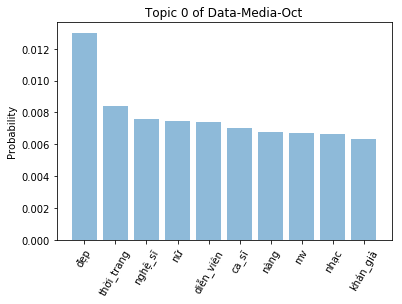

Topic 1: đồng công_ty tiền đầu_tư hàng giá trung_quốc thương_mại kinh_tế triệu
[0.01203761 0.01198671 0.01183402 0.01023073 0.00918733 0.00903463
 0.00893284 0.0085511  0.00829661 0.00819482]


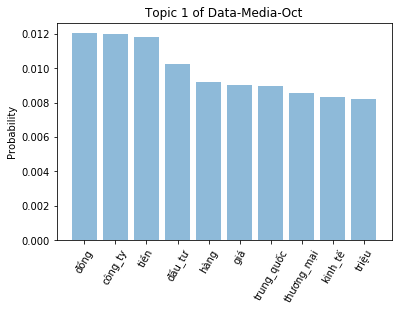

Topic 2: công_an vụ án điều_tra cảnh_sát bắt tp tỉnh đối_tượng thông_tin
[0.02372111 0.01807329 0.0117418  0.01144455 0.01102839 0.01082031
 0.00942322 0.0092746  0.00900707 0.00713437]


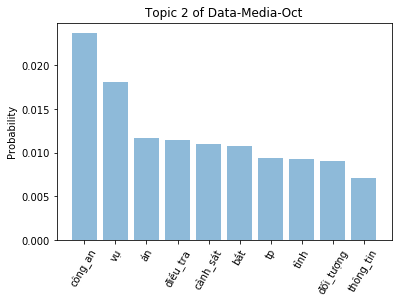

Topic 3: không_khí ô_nhiễm bệnh hà_nội môi_trường bác_sĩ sức_khỏe bệnh_viện ung_thư thuốc
[0.01786259 0.01601101 0.01342424 0.01140929 0.01094639 0.0091765
 0.00830516 0.00819625 0.00770612 0.00623575]


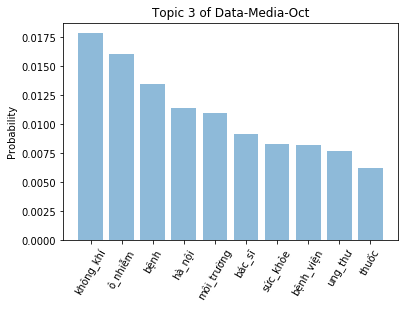

Topic 4: tập phim_truyện khám_phá thế_giới tập_h vtv tiếng việt_nam phim đi
[0.02947885 0.02740248 0.02014982 0.01994511 0.01248774 0.01190284
 0.00973874 0.00973874 0.00947554 0.00903687]


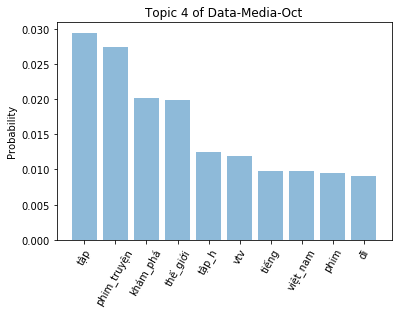

Topic 5: trump tổng_thống trung_quốc đảng biểu_tình hồng_kông chính_trị dân_chủ điều_tra hoa_kỳ
[0.0096088  0.00820577 0.00807822 0.00796484 0.00685942 0.00627837
 0.0060091  0.00573983 0.00477613 0.00467692]


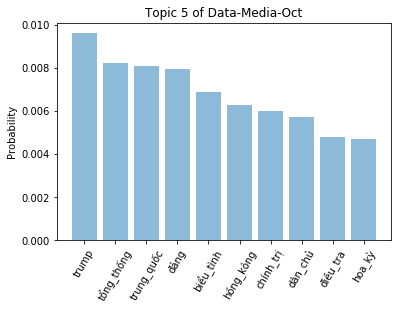

Topic 6: việt_nam game ứng_dụng công_nghệ sự_kiện thông_tin diễn iphone nghiệm trải
[0.01150102 0.01134217 0.00918181 0.00911827 0.00873704 0.00860996
 0.00765686 0.00622722 0.00616368 0.00610014]


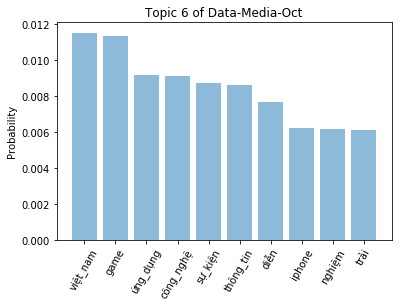

Topic 7: trung_quốc việt_nam tàu biển quốc_tế khu_vực biển_đông nga mỹ máy_bay
[0.01987837 0.01564413 0.01305795 0.01184092 0.00948293 0.00889977
 0.00659249 0.00656713 0.00654178 0.006415  ]


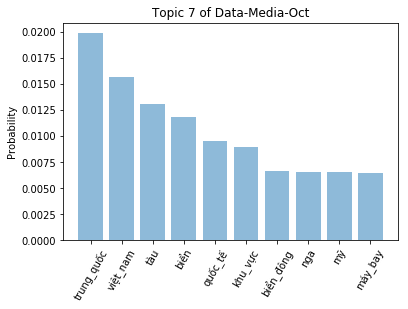

Topic 8: việt_nam trận malaysia đội trận_đấu hlv cầu_thủ đội_tuyển bóng sân
[0.02291441 0.01756523 0.01468198 0.01413189 0.0138853  0.01217811
 0.01214018 0.01105896 0.01088824 0.01075546]


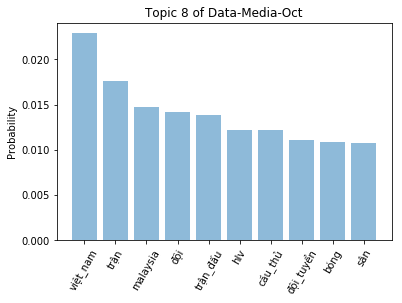

Topic 9: thvl kênh đôi full tình_yêu fanpage youtube lỡ cực phát_sóng
[0.04108407 0.01120913 0.01013738 0.00924426 0.00844045 0.00727939
 0.00714542 0.00701146 0.00683283 0.00669886]


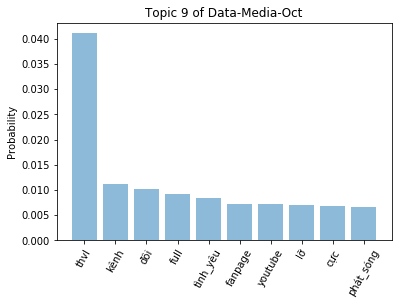

Topic 10: mẹ đi vợ tao tiền chồng bé đứa thuốc đời
[0.03009339 0.02827662 0.02189463 0.01893656 0.01611824 0.01427818
 0.01385892 0.00882787 0.00882787 0.00824557]


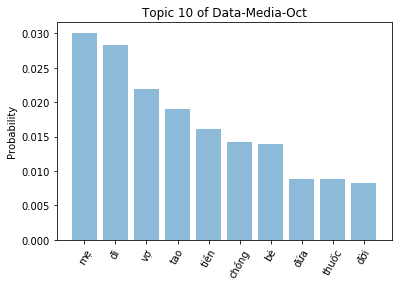

Topic 11: yêu đi chẳng đừng sống phụ_nữ đàn_ông hai hạnh_phúc cuộc_sống
[0.01378774 0.01375549 0.00894999 0.00865973 0.00786956 0.00716003
 0.00699877 0.00685363 0.00677301 0.00672463]


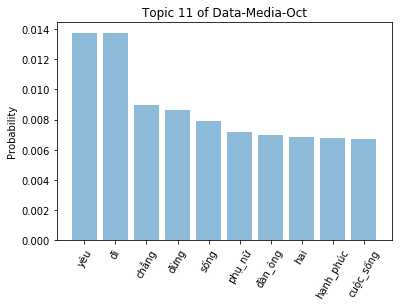

Topic 12: trường học trẻ học_sinh lớp đại_học tiếng giáo_dục phụ_huynh bé
[0.03282243 0.02816503 0.02608808 0.02108451 0.01513688 0.01139208
 0.01003891 0.00953541 0.00928366 0.00811931]


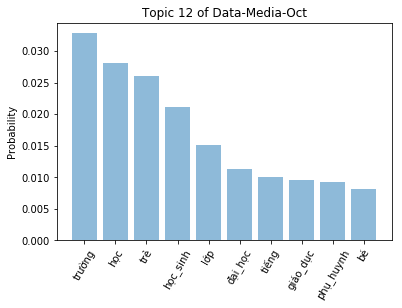

Topic 13: xe đường đi cháy hà_nội dân chạy giao_thông tàu xảy
[0.02729407 0.02512044 0.01605544 0.01034967 0.01020147 0.00943576
 0.00913936 0.00862065 0.00733623 0.00723743]


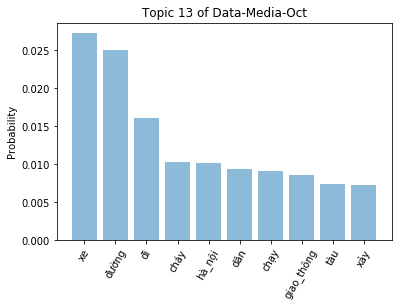

Topic 14: đi món nha bánh lắm ngon đồ thịt gà quán
[0.0125346  0.01136861 0.00901015 0.00763216 0.00755266 0.00742017
 0.00726117 0.00704917 0.00691667 0.00681067]


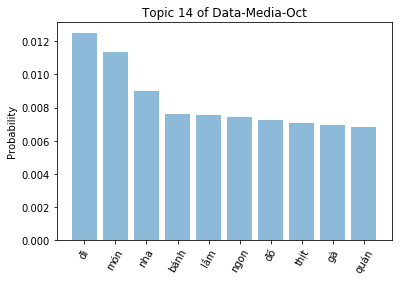

Topic 15: thi giải tham_gia quà chương_trình câu việt_nam gửi giải_thưởng may_mắn
[0.01564471 0.01487988 0.01122953 0.01112523 0.01018657 0.00983892
 0.00938697 0.0084483  0.00740535 0.0068491 ]


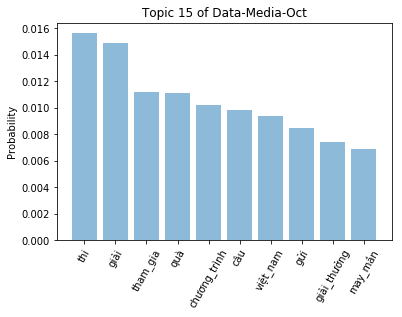

Topic 16: đón tập htv full hấp_dẫn đừng chủ_nhật chồng link nè
[0.01805054 0.01708141 0.01167041 0.01138774 0.01074165 0.01058013
 0.01045899 0.01005518 0.00799577 0.00755158]


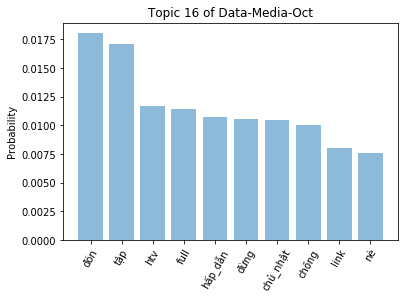

Topic 17: tỉnh dự_án xây_dựng tp ubnd quy_định thông_tin dân đầu_tư tổ_chức
[0.01173037 0.01062    0.01007905 0.00959504 0.00777289 0.00723194
 0.00723194 0.00708959 0.00640628 0.00597921]


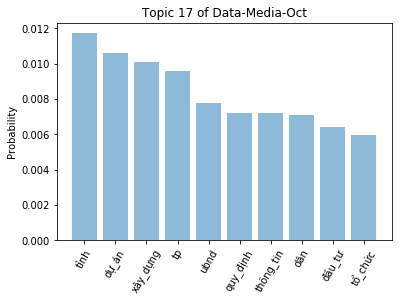

Topic 18: phim đi dám tốt_đẹp tặng xe cướp đầu_bếp kết_quả chuyên_nghiệp
[0.04865249 0.02274622 0.01590697 0.01549247 0.01528522 0.01507796
 0.01476709 0.01414534 0.01404171 0.01404171]


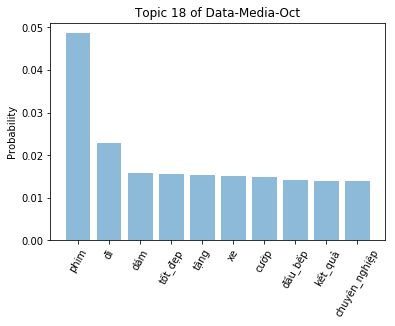

Topic 19: ảnh vàng mùa đi hoa thời lịch_sử hàng phố thu
[0.00746924 0.00712404 0.00706128 0.00593152 0.00564908 0.004739
 0.00467624 0.00458209 0.0043938  0.00417413]


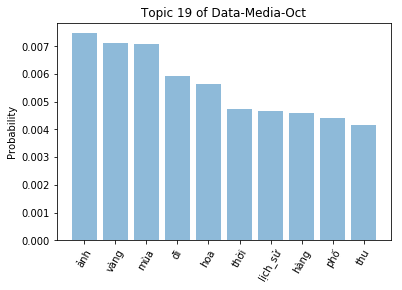

In [16]:
n_top_words = 10
import matplotlib.pyplot as plt 
plt.rc('xtick', labelsize=10)
for i, topic_dist in enumerate(topic_word):
    plt.figure()
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))
    words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    probability = np.array(topic_dist)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print(probability)
    y_pos = np.arange(len(probability))
    plt.bar(y_pos, probability, alpha=0.5)
    plt.xticks(np.arange(0, 10, 1.0),words,rotation=60)
#     plt.yticks(np.arange(0, 0.2, 0.05))
    plt.ylabel('Probability')
    plt.title('Topic '+str(i)+" of "+dataname)
    plt.savefig(root+"fig/Topic "+str(i)+".png")
    plt.show()
    plt.close()
